### 과잉적합과 회피전략
    셈플이 20개인 훈련 집합

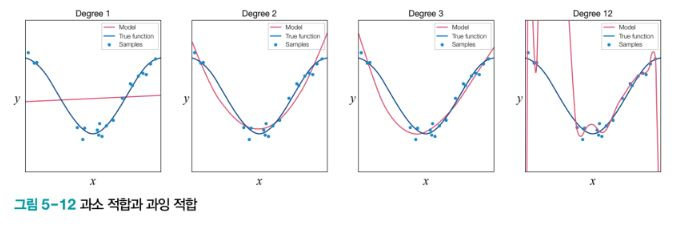

###### 과잉적합에 따른 부정확한 예측

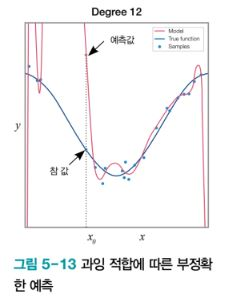

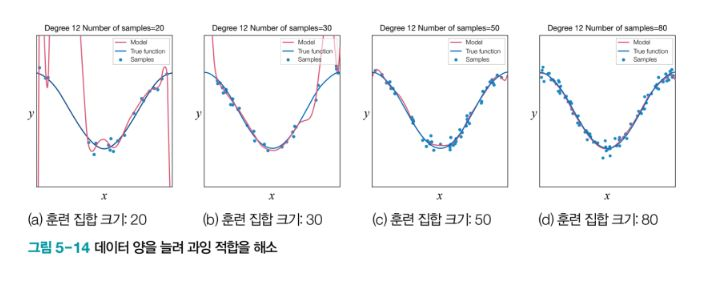

#### 손실함수
     신경망은 여러개의 셈플로 구성된 미니배치단위로 손실 함수 5.8을 미니배치단위로 적용하고 평균을 취한값이 MSE

##### 평균제곱 오차 - 대표적인 손실함수
      오류를 줄이는 방법으로 가중치를 교정하는 작업을 학습

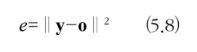

In [1]:
# 시험문제에 함정이 많다.- 데이터가 순수하지 못하고 잡음이 있거나.. 기타 등등.. 
# 공부를 열심히 한 학생이 , 찍은 학생보다 점수가 낮을수 있는 상황
# 손실함수중에.... 교차엔트로피

In [ ]:
# 엔트로피는 확률분포의 무작위성, 즉 불확실성을 측정하는 함수
# 정상적인 주사위의 확률분포  1 2 3 4 5 6  1/6.  불확실성이 높다. 
# 찌그러진 주사위 1의 면적이 가장넒다면 예측가능성이 높아짐--> 불확실성이 낮아짐
# x = {e1, e2 ..... ek} 요소를 값으로 갖는 확률 변수   
# k는 서로다른 사건의 개수
# ei 는 i번째 사건 ( 주사위... 눈이 i가 나오는 사건)
# 공정한 주사위 눈이 i가 나올 확률 p(ei) = 1/6

##### 교차 엔트로피

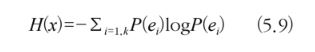

In [ ]:
# 공정한 주사위의 엔트로피는 5.10 밑의 수식과 같고.. 여기서 log는 밑이 e인 자연로그를 사용

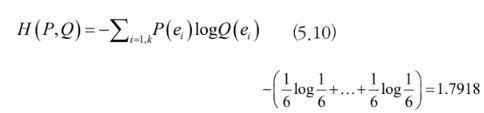

In [ ]:
# 교차 엔트로피는 : 두 확률 분포가 다른 정도를 측정
# 공정한 주사위가 2개  두개 모두 확률 분포가 같으므로 교차 엔트로피가 작다
# 공정한 주사위 찌그러진 주사위는 교차 엔트로피가 크다 5.10과 같은 수식
# 예를 들어서 p q가 모두 공정한 주사위의 확률 분포면  1.7918이 나오는 수식과 같고
# P는 정상 Q는 찌그러진 주사위 - 확률 분포는 예) 1 1/2  나머지눈은 1/10확률을 갖는다면 아래와 같은 수식
# 2.0xxx  교차 엔트로피가 더 크다

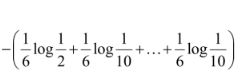

In [ ]:
# 평균제곱보다는 교차 엔트로피의 계열을 손실함수로 많이 상용한다

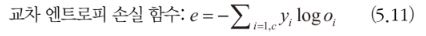

In [2]:
# 손실함수의 성능비교  MSE VS CROSS ENTROPY

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [4]:
# mnist 읽어서 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test) =  mnist.load_data()
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [5]:
# 신경망 구조  L : 5  은닉층 L-1
n_input = 784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output = 10

In [6]:
# mse

In [7]:
# tf.keras.losses.categorical_crossentropy

In [8]:
# 하나의 그래프에 시각화... 성능 비교
# train_mse/val_mse   train_cr / val_cr

In [9]:
def build_model(loss = tf.keras.losses.categorical_crossentropy):
    model = tf.keras.models.Sequential()
    model.add(layers.Dense(n_hidden1, activation='relu',input_shape = (n_input,)))
    model.add(layers.Dense(n_hidden2, activation='relu'))
    model.add(layers.Dense(n_hidden3, activation='relu'))
    model.add(layers.Dense(n_hidden4, activation='relu'))
    model.add(layers.Dense(n_output, activation='softmax'))
    model.compile(loss = loss,optimizer=optimizers.Adam(learning_rate=0.0001), metrics=['acc'])
    hist = model.fit(x_train,y_train,batch_size=128, epochs=30,validation_data=(x_test,y_test),verbose=2)
    return model,hist             

In [11]:
mse_model,mse_hist = build_model('mse')
ca_model,ca_hist = build_model()

In [ ]:
# 하나의 그래프에서 손실함수 성능 비교
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(mse_hist.history['acc'], label='mse accuracy')
plt.plot(mse_hist.history['val_acc'],label = 'mse val_accuracy')
plt.plot(ca_hist.history['acc'], label = 'cross entropy accuracy')
plt.plot(ca_hist.history['val_acc'], label = 'cross entropy val_accuracy')
plt.legend()
plt.grid()
plt.show()

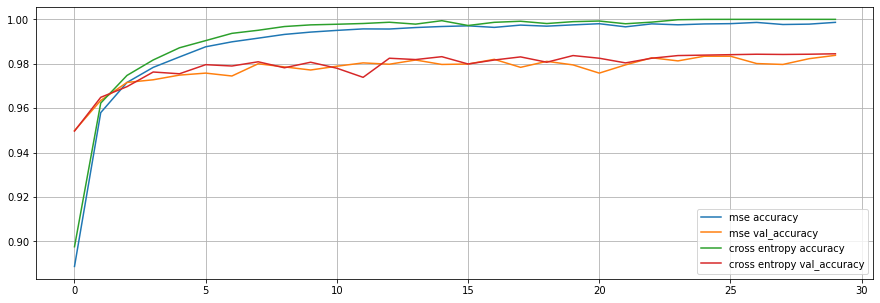